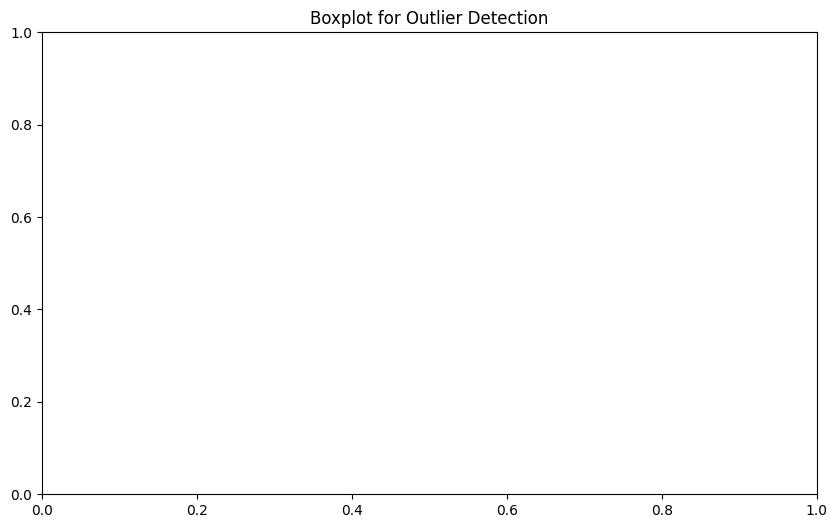

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion Matrix:
 [[0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Best Model Accuracy: 0.0


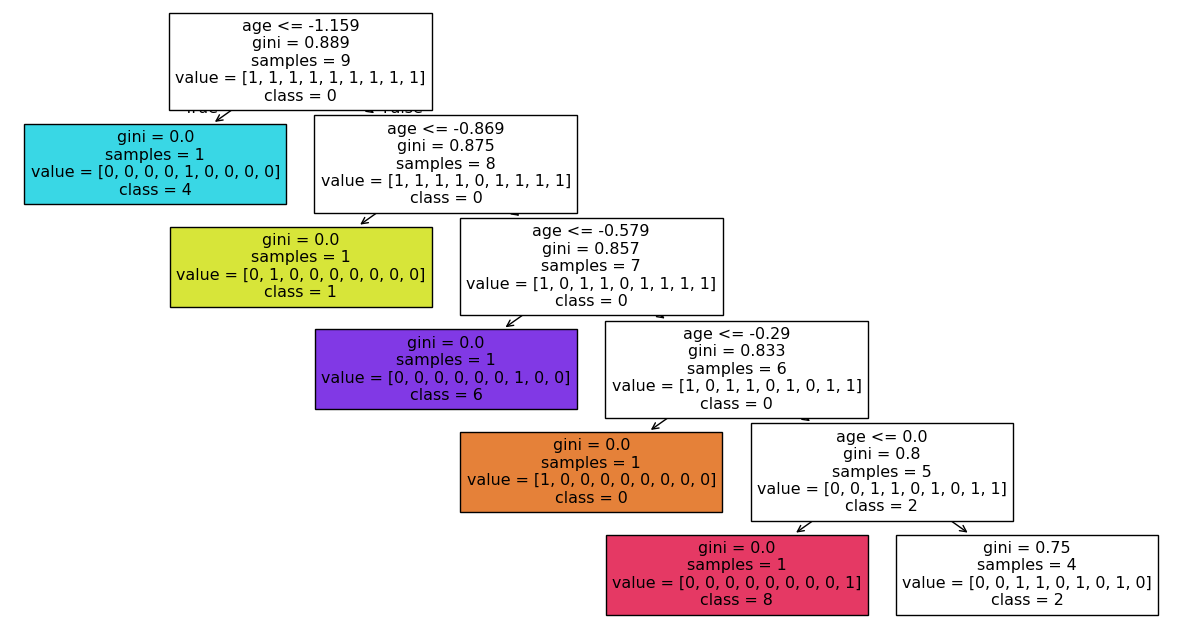

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_excel('heart_disease.xlsx')  # Replace with actual dataset path

# Data Preprocessing
# Handling missing values
df.dropna(inplace=True)

# Handling outliers using boxplot and IQR
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot for Outlier Detection")
plt.show()

numerical_df = df.select_dtypes(include=[np.number])

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers only in numerical columns
df = df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]


# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting dataset into features and target
X = df.drop(columns=['Age in years'])  # Replace 'Target' with actual target column name
y = df['Age in years']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter Tuning with deeper trees and regularization
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.1]  # Adding regularization parameter
}
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

# Visualizing the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)])
plt.show()


##Interview questions:

1. Common Hyperparameters of Decision Tree Models and Their Effects
max_depth: Limits the depth of the tree. A shallow tree may underfit, while a very deep tree may overfit.
min_samples_split: The minimum number of samples required to split a node. Higher values prevent overfitting by making the tree less complex.
min_samples_leaf: The minimum number of samples that must be present in a leaf node. Larger values smooth the model and reduce overfitting.
criterion (gini or entropy): Defines how the tree determines the best split at each node.
ccp_alpha: The pruning parameter that helps reduce overfitting by removing nodes that provide little information gain.
2. Difference Between Label Encoding and One-Hot Encoding
Label Encoding: Converts categorical values into numeric values (e.g., ["Apple", "Banana", "Cherry"] → [0, 1, 2]). However, it introduces an ordinal relationship, which may not be suitable for nominal categories.
One-Hot Encoding: Creates separate binary columns for each category (e.g., "Apple" → [1,0,0], "Banana" → [0,1,0], "Cherry" → [0,0,1]). It prevents ordinal relationships but increases the dimensionality of the dataset.